In [ ]:
import numpy as np
import pandas as pd

"A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has."

In [2]:
# Uninformative priors, every number between 0-1000 is equally likely (uniform)

prior_dist = [n for n in range(1, 1001)]
prior_probas = [1/1000 for n in range(1, 1001)]

df = pd.DataFrame(prior_probas, prior_dist).rename(columns={0:'prior_proba'})
df.tail()

,prior_proba
996,0.001
997,0.001
998,0.001
999,0.001
1000,0.001


C:\Users\YIGAS\AppData\Local\Temp\ipykernel_2676\1746435429.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.016666666666666666, 0.01639344262295082, 0.016129032258064516, 0.015873015873015872, 0.015625, 0.015384615384615385, 0.015151515151515152, 0.014925373134328358, 0.014705882352941176, 0.014492753623188406, 0.014285714285714285, 0.014084507042253521, 0.013888888888888888, 0.0136986301369863, 0.013513513513513514, 0.013333333333333334, 0.013157894736842105, 0.012987012987012988, 0.01282051282051282, 0.012658227848101266, 0.0125, 0.012345679012345678, 0.012195121951219513, 0.012048192771084338, 0.011904761904761904, 0.011764705882352941, 0.011627906976744186, 0.011494252873563218, 0.011363636363636364, 0.011235955056179775, 0.011111111111111112, 0.01098901098901099, 0.010869565217391304, 0.010752688172043012, 0.010638297872340425, 0.010526315789473684, 0.010416666666666666, 0.010309278350515464,

<Axes: >

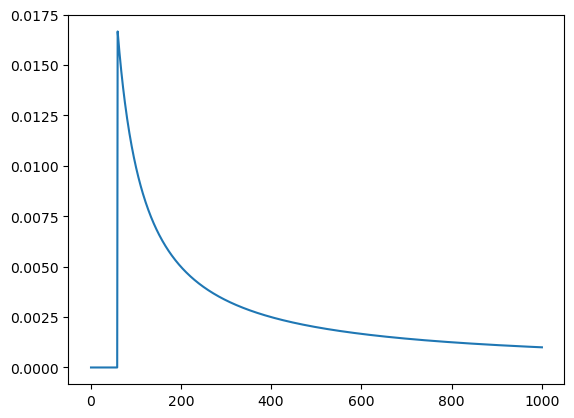

In [3]:
# What is the probability of observing number 60 under each hypothesis

likelihood_1 = [1/n for n in df.index if n >= 60]
df['likelihood_1'] = 0
df.loc[df.index >= 60, 'likelihood_1'] = likelihood_1

df['likelihood_1'].plot() # likelihood curve

# When we start with an uninformative prior, likelihood f and the posterior is exactly the same.

In [ ]:
probability_of_data = np.sum(df['prior_proba'] * df['likelihood_1'])
probability_of_data

0.0028222671142652733

<Axes: >

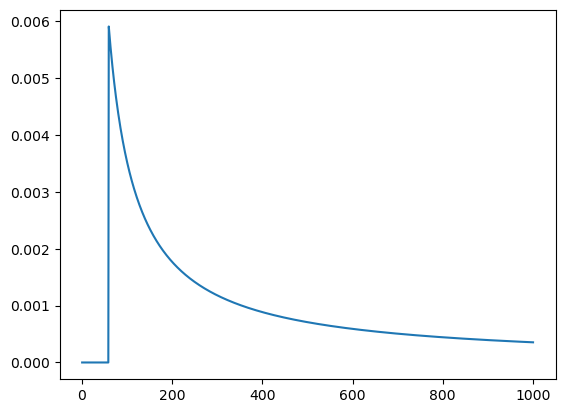

In [5]:
df['posterior_1'] = df['likelihood_1'] * df['prior_proba'] / probability_of_data
df['posterior_1'].plot()

In [6]:
# Finding the mean

np.sum(df['posterior_1'] * df.index)

333.4198932637079

1 to 1000 for uniform distribution is arbitrary, there's no justification. Let's see what happens with different upperbounds.

In [ ]:
prior_dist = [n for n in range(1, 1001)]
prior_probas = [1/1000 for n in range(1, 1001)] # probability of hypo

df = pd.DataFrame(prior_probas, prior_dist).rename(columns={0:'prior_proba'})

likelihood_1 = [1/n for n in df.index if n >= 60]
df['likelihood_1'] = 0
df.loc[df.index >= 60, 'likelihood_1'] = likelihood_1

probability_of_data = np.sum(df['prior_proba'] * df['likelihood_1']) # P(H) * P(D | H)

df['posterior_1'] = df['likelihood_1'] * df['prior_proba'] / probability_of_data # P(H | D) = P(H) * P(D | H) / P(D)

np.sum(df['posterior_1'] * df.index) # Mean of the posterior

C:\Users\YIGAS\AppData\Local\Temp\ipykernel_2676\2506391163.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.016666666666666666, 0.01639344262295082, 0.016129032258064516, 0.015873015873015872, 0.015625, 0.015384615384615385, 0.015151515151515152, 0.014925373134328358, 0.014705882352941176, 0.014492753623188406, 0.014285714285714285, 0.014084507042253521, 0.013888888888888888, 0.0136986301369863, 0.013513513513513514, 0.013333333333333334, 0.013157894736842105, 0.012987012987012988, 0.01282051282051282, 0.012658227848101266, 0.0125, 0.012345679012345678, 0.012195121951219513, 0.012048192771084338, 0.011904761904761904, 0.011764705882352941, 0.011627906976744186, 0.011494252873563218, 0.011363636363636364, 0.011235955056179775, 0.011111111111111112, 0.01098901098901099, 0.010869565217391304, 0.010752688172043012, 0.010638297872340425, 0.010526315789473684, 0.010416666666666666, 0.010309278350515464,

333.4198932637079

In [8]:
def single_bayesian_process(upper_bound, observed):
    prior_dist = [n for n in range(1, upper_bound+1)]
    prior_probas = [1/upper_bound for n in range(1, upper_bound+1)]

    df = pd.DataFrame(prior_probas, prior_dist).rename(columns={0:'prior_proba'})

    likelihood = [1/n for n in df.index if n >= observed]
    df['likelihood'] = 0
    df.loc[df.index >= observed, 'likelihood'] = likelihood

    total_p_of_data = np.sum(df['prior_proba'] * df['likelihood'])

    df['posterior'] = df['likelihood'] * df['prior_proba'] / total_p_of_data

    avg = np.sum(df['posterior'] * df.index)

    return df, avg

In [9]:
for val in [500, 1000, 1500, 2000]:
    df, mean = single_bayesian_process(val, 60)
    print('Upper bound:' + str(val) + ' -> ' + str(mean), '\n')

Upper bound:500 -> 207.07922798341045 

Upper bound:1000 -> 333.4198932637079 

Upper bound:1500 -> 446.46652545364236 

Upper bound:2000 -> 552.1790171646376 



C:\Users\YIGAS\AppData\Local\Temp\ipykernel_2676\3831279630.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.016666666666666666, 0.01639344262295082, 0.016129032258064516, 0.015873015873015872, 0.015625, 0.015384615384615385, 0.015151515151515152, 0.014925373134328358, 0.014705882352941176, 0.014492753623188406, 0.014285714285714285, 0.014084507042253521, 0.013888888888888888, 0.0136986301369863, 0.013513513513513514, 0.013333333333333334, 0.013157894736842105, 0.012987012987012988, 0.01282051282051282, 0.012658227848101266, 0.0125, 0.012345679012345678, 0.012195121951219513, 0.012048192771084338, 0.011904761904761904, 0.011764705882352941, 0.011627906976744186, 0.011494252873563218, 0.011363636363636364, 0.011235955056179775, 0.011111111111111112, 0.01098901098901099, 0.010869565217391304, 0.010752688172043012, 0.010638297872340425, 0.010526315789473684, 0.010416666666666666, 0.010309278350515464,

A lot of sensitivity to the upper bound.

In general, with more data different priors will converge.

In [10]:
df, mean = single_bayesian_process(1000, 60)

df.head()

C:\Users\YIGAS\AppData\Local\Temp\ipykernel_2676\3831279630.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.016666666666666666, 0.01639344262295082, 0.016129032258064516, 0.015873015873015872, 0.015625, 0.015384615384615385, 0.015151515151515152, 0.014925373134328358, 0.014705882352941176, 0.014492753623188406, 0.014285714285714285, 0.014084507042253521, 0.013888888888888888, 0.0136986301369863, 0.013513513513513514, 0.013333333333333334, 0.013157894736842105, 0.012987012987012988, 0.01282051282051282, 0.012658227848101266, 0.0125, 0.012345679012345678, 0.012195121951219513, 0.012048192771084338, 0.011904761904761904, 0.011764705882352941, 0.011627906976744186, 0.011494252873563218, 0.011363636363636364, 0.011235955056179775, 0.011111111111111112, 0.01098901098901099, 0.010869565217391304, 0.010752688172043012, 0.010638297872340425, 0.010526315789473684, 0.010416666666666666, 0.010309278350515464,

,prior_proba,likelihood,posterior
1,0.001,0.0,0.0
2,0.001,0.0,0.0
3,0.001,0.0,0.0
4,0.001,0.0,0.0
5,0.001,0.0,0.0


In [ ]:
# On the next iteration, the latest posterior becomes our new prior: Let's say we observe 90 now.

new_prior_dist = df.index
new_prior_probas = df['posterior'].tolist()

new_df = pd.DataFrame(new_prior_probas, new_prior_dist).rename(columns={0:'prior_proba'})

likelihood = [1/n for n in new_df.index if n >= 90]
new_df['likelihood'] = 0
new_df.loc[new_df.index >= 90, 'likelihood'] = likelihood

total_p_of_data = np.sum(new_df['prior_proba'] * new_df['likelihood'])

new_df['posterior'] = new_df['likelihood'] * new_df['prior_proba'] / total_p_of_data

new_df

C:\Users\YIGAS\AppData\Local\Temp\ipykernel_2676\3177816586.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.011111111111111112, 0.01098901098901099, 0.010869565217391304, 0.010752688172043012, 0.010638297872340425, 0.010526315789473684, 0.010416666666666666, 0.010309278350515464, 0.01020408163265306, 0.010101010101010102, 0.01, 0.009900990099009901, 0.00980392156862745, 0.009708737864077669, 0.009615384615384616, 0.009523809523809525, 0.009433962264150943, 0.009345794392523364, 0.009259259259259259, 0.009174311926605505, 0.00909090909090909, 0.009009009009009009, 0.008928571428571428, 0.008849557522123894, 0.008771929824561403, 0.008695652173913044, 0.008620689655172414, 0.008547008547008548, 0.00847457627118644, 0.008403361344537815, 0.008333333333333333, 0.008264462809917356, 0.00819672131147541, 0.008130081300813009, 0.008064516129032258, 0.008, 0.007936507936507936, 0.007874015748031496, 0.00

,prior_proba,likelihood,posterior
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000
...,...,...,...
996,0.000356,0.001004,0.000099
997,0.000355,0.001003,0.000099
998,0.000355,0.001002,0.000099
999,0.000355,0.001001,0.000098


In [ ]:
np.sum(new_df['posterior'] * new_df.index) # mean

237.282670041256

German Tank Problem

https://en.wikipedia.org/wiki/German_tank_problem

In [13]:
def german_tank_problem(upper_bound, observed):
    if len(observed) == 1:
        prior_dist = [n for n in range(1, upper_bound+1)]
        prior_probas = [1/upper_bound for n in range(1, upper_bound+1)]

        initial_df = pd.DataFrame(prior_probas, prior_dist).rename(columns={0:'prior_proba'})

        for data in observed:
            likelihood = [1/n for n in initial_df.index if n >= data]
            initial_df['likelihood'] = 0
            initial_df.loc[initial_df.index >= data, 'likelihood'] = likelihood

            total_p_of_data = np.sum(initial_df['prior_proba'] * initial_df['likelihood'])

            initial_df['posterior'] = initial_df['likelihood'] * initial_df['prior_proba'] / total_p_of_data

        return initial_df.loc[:, ['posterior']]
    
    else:
        prior_dist = [n for n in range(1, upper_bound+1)]
        prior_probas = [1/upper_bound for n in range(1, upper_bound+1)]

        initial_df = pd.DataFrame(prior_probas, prior_dist).rename(columns={0:'prior_proba'})

        for data in observed:
            likelihood = [1/n for n in initial_df.index if n >= data]
            initial_df['likelihood'] = 0
            initial_df.loc[initial_df.index >= data, 'likelihood'] = likelihood

            total_p_of_data = np.sum(initial_df['prior_proba'] * initial_df['likelihood'])

            initial_df['posterior'] = initial_df['likelihood'] * initial_df['prior_proba'] / total_p_of_data

            prior_probas = initial_df['posterior'] # last posterior becomes new prior
            initial_df['prior_proba'] = prior_probas

        return initial_df.loc[:, ['posterior']]

In [14]:
df_tank = german_tank_problem(200, [19, 40, 42, 60])
df_tank

C:\Users\YIGAS\AppData\Local\Temp\ipykernel_2676\1006567620.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.05263157894736842, 0.05, 0.047619047619047616, 0.045454545454545456, 0.043478260869565216, 0.041666666666666664, 0.04, 0.038461538461538464, 0.037037037037037035, 0.03571428571428571, 0.034482758620689655, 0.03333333333333333, 0.03225806451612903, 0.03125, 0.030303030303030304, 0.029411764705882353, 0.02857142857142857, 0.027777777777777776, 0.02702702702702703, 0.02631578947368421, 0.02564102564102564, 0.025, 0.024390243902439025, 0.023809523809523808, 0.023255813953488372, 0.022727272727272728, 0.022222222222222223, 0.021739130434782608, 0.02127659574468085, 0.020833333333333332, 0.02040816326530612, 0.02, 0.0196078431372549, 0.019230769230769232, 0.018867924528301886, 0.018518518518518517, 0.01818181818181818, 0.017857142857142856, 0.017543859649122806, 0.017241379310344827, 0.0169491525

,posterior
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
...,...
196,0.000440
197,0.000431
198,0.000422
199,0.000414


In [15]:
np.sum(df_tank.index * df_tank['posterior'])

83.57997557909891

In [16]:
# median

total = 0
for i in df_tank.index:
    total += df_tank.loc[i, 'posterior']
    if total >= .5:
        print(i)
        break
    else:
        continue



74


<Axes: >

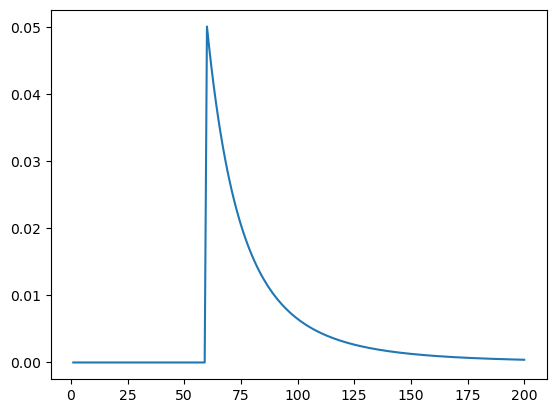

In [17]:
df_tank['posterior'].plot()